<a href="https://colab.research.google.com/github/xantabdoc/H8_PYTNONL_062/blob/main/assignment/PYTN_ASSGN_1_BTACH_062_RUBEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Required Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import folium
import urllib,urllib.request # Using urllib to import from web:my github
from wordcloud import WordCloud, STOPWORDS
from PIL import Image #using package pillow to import picture
from geopy.geocoders import Nominatim #use to request longitude and latitude of each area 
from geopy.extra.rate_limiter import RateLimiter
from matplotlib import pyplot as plt
from google.colab import drive    # We Used Google Drive Because We Stored London Data Crime In Google Drive

# **2. Read Data London Crime 2008-2016 From Goolge Drive**

In [ ]:
# When using data from Gdrive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/Dataset
df=pd.read_csv('london_crime_by_lsoa.csv') # Downloading Data From Goolge Drive
df.head()

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Dataset


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# **3. Data Cleansing (Removing Unrelatable Data)**

In [ ]:
df = df[df.value != 0] # delete all rows that has value = 0 in it
df.drop(columns='lsoa_code', inplace=True) # Drop Isoa_code as it not really usefull for the analysis
df.rename(columns={'borough':'location'},inplace=True) # change name borough to location
df.rename(columns={'value':'num of crime'},inplace=True) # change name value to the total of crime in that month
df.sort_values('year',inplace=True) #sort dataframe as per year
#Check if there is any null


# **4. Evaluated Data Cleansing Result**

In [ ]:
df.isnull().sum() # Check if there is still any null value in dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419099 entries, 8872457 to 9
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   location        object
 1   major_category  object
 2   minor_category  object
 3   num of crime    int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 182.6+ MB


,location,major_category,minor_category,num of crime,year,month
8872457,Enfield,Sexual Offences,Other Sexual,1,2008,1
12696847,Richmond upon Thames,Burglary,Burglary in a Dwelling,1,2008,10
6545942,Camden,Theft and Handling,Theft From Motor Vehicle,1,2008,3
6545943,Wandsworth,Theft and Handling,Other Theft,1,2008,7
6545947,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2008,3


# **5. Grouping Total Crime Per Years**

In [ ]:
crime_per_year=df.groupby(['location','year'])['num of crime'].sum()
crime_per_year.drop(columns='month', inplace=True)

maxRows = len(crime_per_year)
print(maxRows)
crime_per_year.head(maxRows)

294


location              year
Barking and Dagenham  2008    17656
                      2009    17713
                      2010    17130
                      2011    16686
                      2012    15990
                              ...  
Westminster           2012    59226
                      2013    53852
                      2014    47564
                      2015    47395
                      2016    48330
Name: num of crime, Length: 294, dtype: int64

# **6. Evaluate City Crime Per Years With Line Chart Diagram**

<Figure size 7200x3600 with 0 Axes>

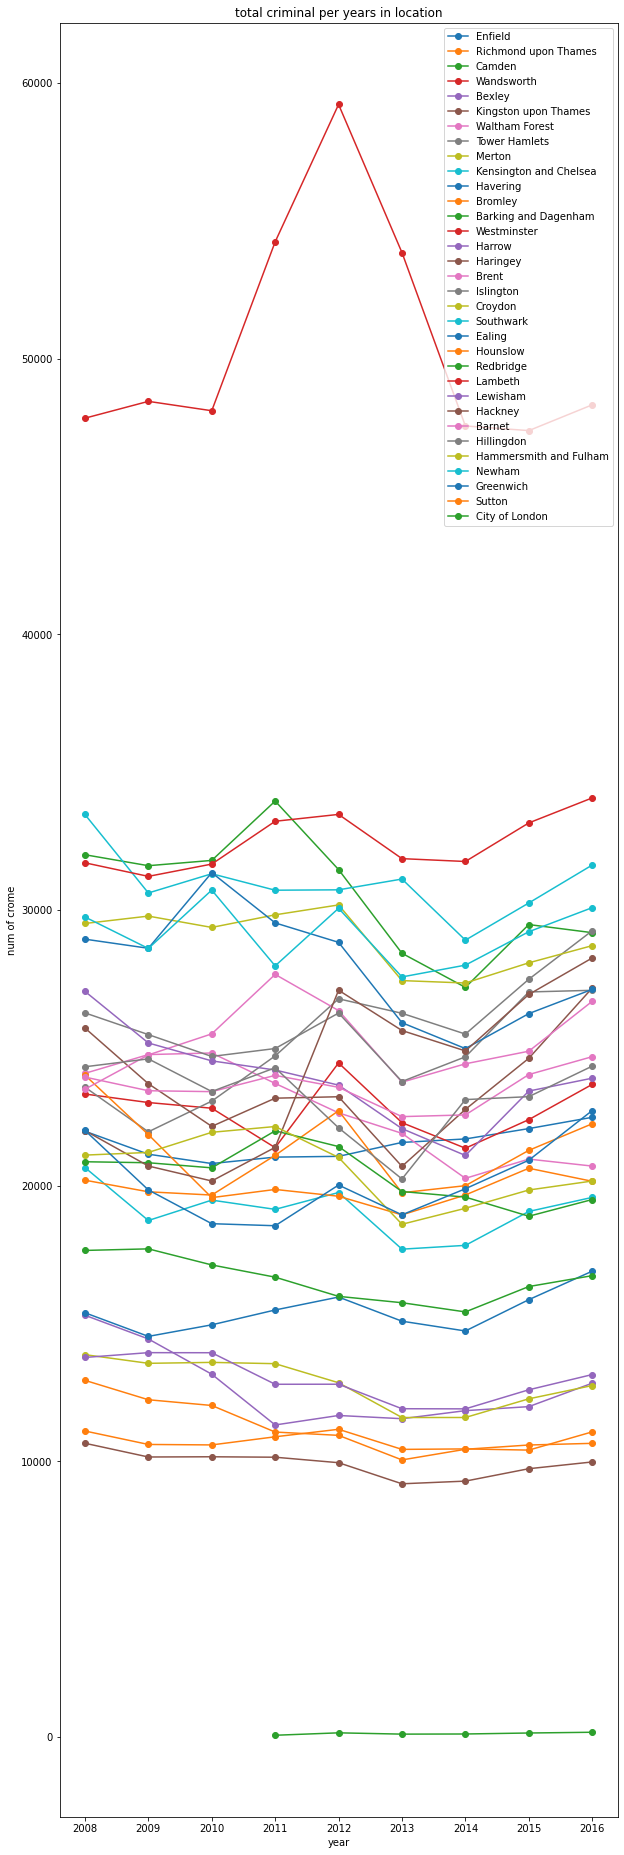

<Figure size 7200x3600 with 0 Axes>

In [ ]:
ndg = df.groupby(['location','year'])['num of crime'].sum()
locationList = df['location']
locationList = locationList.drop_duplicates()
for x in locationList:
  ndg[x].plot(marker='o', figsize=(10,len(locationList)))
plt.title("total criminal per years in location")
plt.legend(locationList)
plt.xlabel('year')
plt.ylabel('num of crime')
plt.figure(figsize=(100,50))




## conslusion
There are one city with high crime activity and one city with lowest crime activity and standard crime activity at range 1000 to 3000 every years

# **7. Evaluate If Every Years Crime Activity Will Increase Sifnificant**

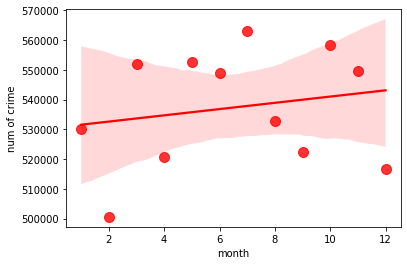

In [ ]:
sctr = df.reset_index()
sctrX = df.groupby('month', as_index=False).sum()
ax = sns.regplot(x='month', y='num of crime', data=sctrX, color='red', marker='o', scatter_kws={'s':100})

## conclusion 
The crime data is hard to control with statistic because there are to many variant in a month


# **8. Evaluate Crime Frequency Every Month With Histogram Diagram (Histogram)**

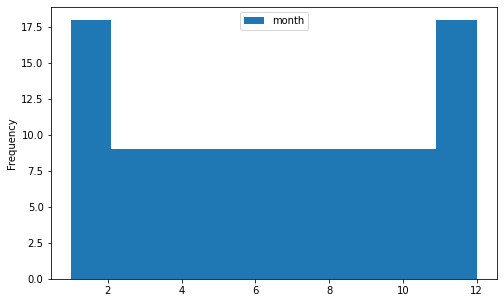

In [ ]:
histogram_data = df
histogram_data = histogram_data.groupby(['year','month'], as_index=False).sum()
histogram_data.plot(kind='hist',x='year', y='month', figsize=(8,5))

## conclusion
looks like january and december is the time for mafia to working

# **9. Evaluate Crime With (Bar Chart)** 

      num of crime
year              
2008        738641
2009        717214
2010        715324
2011        724915
2012        737329
2013        686407
2014        680183
2015        711624
2016        736121


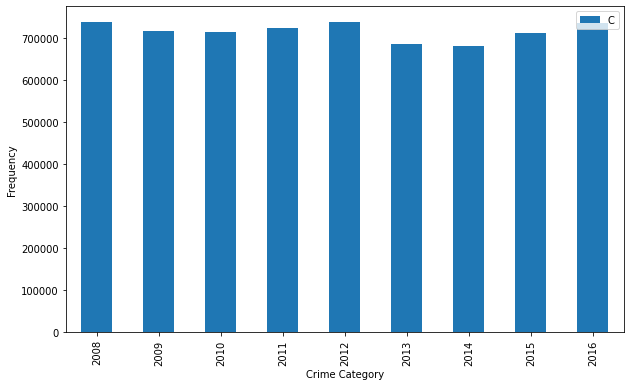

In [ ]:
barchart_data = df
barchart_data = barchart_data.groupby('year',as_index=True).sum()
barchart_data = barchart_data.drop(columns=['month'])
print(barchart_data)
barchart_data.plot(kind='bar', figsize=(10,6))
plt.legend('Crime Category Frequency')
plt.ylabel('Frequency')
plt.xlabel('Crime Category')
plt.locator_params(tight=True)
plt.draw()

## Conclusion
with this bar chart we can get every year crime activity more than 600K crime each year

# **10. Evaluate Crime Category With Pie Chart**

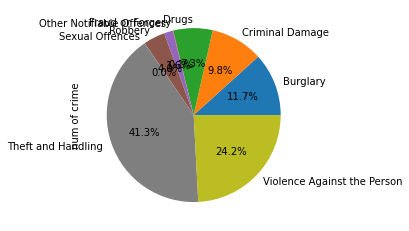

In [ ]:
piechart = df
piechart = piechart.groupby(['major_category'],axis=0).sum()
piechart['num of crime'].plot(kind='pie',autopct='%1.1f%%',shadow=True)

## conclusion
The bigest crime category activity is thieft and handling

# **11. Evaluate Country Crime with Word Clouds**


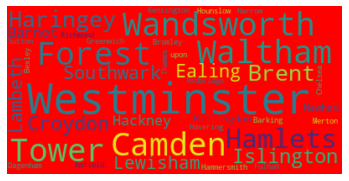

In [ ]:
wcdf = df
lcdf_location_list = wcdf.groupby('location',as_index=True)['num of crime'].sum()
stringCollection = ""
for x in wcdf['location'].drop_duplicates():
  count = 0
  newx = int(round(lcdf_location_list[x]/100000,+1))
  while (count < newx):
      count =count+1
      stringCollection = stringCollection + x.replace(" "," ") + " "
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='red',
    stopwords=stopwords
)
wordcloud.generate(stringCollection)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion
with the word cloud we will see Westminster is the biggest crime activity

# **12 Evaluate Westminster Crime With Box Diagram**

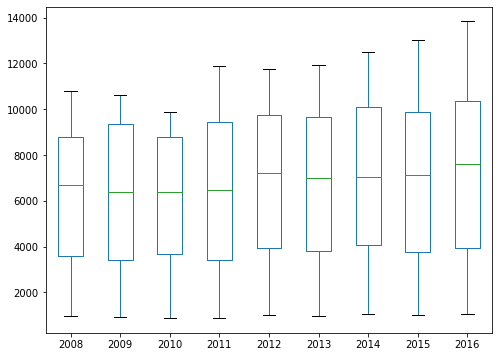

In [ ]:
westminster_df = df
westminster_df = westminster_df.groupby(['location','year','month'],as_index=True)['month'].sum()
westminster_df_year = df['year'].drop_duplicates()
westminster_df_month = df['month'].drop_duplicates()
sx = {}
for x in westminster_df_year:
  sx[x] = {}
  for y in westminster_df_month:
    sx[x][y] = westminster_df['Westminster'][x][y]
wesminster_dp_i = pd.DataFrame(data=sx,columns=westminster_df_year,index=[1,2,3,4,5,6,7,8,9,10,11,12])
wesminster_dp_i.plot(kind='box',figsize=(8,6))

## Conslusion
Westminster crime activity increase from 2008 to 2016 but the lowest crime activity is still same

# **13 Analyzing Crime Activity With Map Diagrams**

In [ ]:
world_geo = r'world_countries.json'
map_activity = df.groupby('location',as_index=False).sum()
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
print(map_activity)
world_map = folium.Map(location=[0,0],zoom_start=2,tiles='Mapbox Bright')
folium.Choropleth(
    geo_data=world_geo,
    data=map_activity,
    columns=['location','num of crime'],
    key_on='feature.properties.name',
    tiles='"http://{s}.tiles.mapbox.com/v4/wtgeographer.2fb7fc73/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY2twMjV2ajdkMTZrbzJucHI3YTgxbjM2diJ9.oHD6Rw0KJYhnaYzK2pL__Q"',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Activity',
).add_to(world_map)

world_map

                  location  num of crime       year   month
0     Barking and Dagenham        149447  174735860  560596
1                   Barnet        212191  255915005  827498
2                   Bexley        114136  148773536  480844
3                    Brent        227551  261412455  848278
4                  Bromley        184349  221017590  714532
5                   Camden        275147  225398926  730035
6           City of London           780    1137829    3850
7                  Croydon        260294  296161886  956470
8                   Ealing        251562  281679565  910099
9                  Enfield        193880  237324752  766168
10               Greenwich        181568  210569414  681141
11                 Hackney        217119  234456100  757128
12  Hammersmith and Fulham        185259  185267919  600536
13                Haringey        213272  234029660  758589
14                  Harrow        116848  148867726  481589
15                Havering        138947